In [64]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression

Read training data

In [65]:
df = pd.read_csv('train2-14.csv')

df.head()

,X..language,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
0,7,8.96048,0.662347,NaN,7.05318,-3.84660,13.5787,-10.61340,9.06420,3.85580,1.623490,7.76953,-5.634160
1,10,5.83506,-1.911120,6.16262,9.40376,-6.85716,11.6598,-8.21644,4.61204,4.45172,-0.500779,2.30218,3.605000
2,10,5.85969,-2.696390,6.96419,10.36360,-6.99147,NaN,-9.12161,NaN,3.31190,-0.661940,2.45927,0.779650
3,10,1.87093,2.359920,4.81523,10.71310,-5.40828,11.3160,-7.75189,8.26122,2.81724,-0.671799,2.53009,2.581380
4,10,6.45318,3.275600,2.98869,10.70180,-7.43619,10.0012,-6.88597,5.19160,2.46111,0.530241,3.56443,0.223712


In [66]:
X_train = df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       'X10', 'X11', 'X12']]

In [67]:
y_train = df['X..language']

<AxesSubplot:>

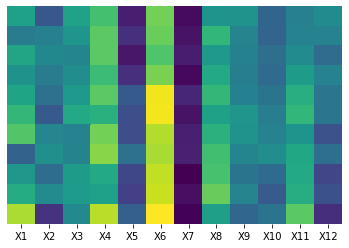

In [68]:
sns.heatmap(X_train.dropna(how='any'), yticklabels=False, cbar=False, cmap='viridis')

In [69]:
X_train.mean()

X1      6.303430
X2      1.779813
X3      3.901588
X4      8.708528
X5     -4.050346
X6     13.817889
X7     -7.818332
X8      8.147350
X9      2.772577
X10     0.156958
X11     5.947148
X12    -1.244698
dtype: float64

In [82]:
X_train.apply(lambda x: x.fillna(x.mean()))

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
0,8.96048,0.662347,3.901588,7.053180,-3.846600,13.578700,-10.613400,9.06420,3.855800,1.623490,7.769530,-5.634160
1,5.83506,-1.911120,6.162620,9.403760,-6.857160,11.659800,-8.216440,4.61204,4.451720,-0.500779,2.302180,3.605000
2,5.85969,-2.696390,6.964190,10.363600,-6.991470,13.817889,-9.121610,8.14735,3.311900,-0.661940,2.459270,0.779650
3,1.87093,2.359920,4.815230,10.713100,-5.408280,11.316000,-7.751890,8.26122,2.817240,-0.671799,2.530090,2.581380
4,6.45318,3.275600,2.988690,10.701800,-7.436190,10.001200,-6.885970,5.19160,2.461110,0.530241,3.564430,0.223712
5,4.30918,1.837270,3.780870,8.906960,-5.526200,12.015900,-8.501440,6.83482,2.262840,-0.022188,5.372430,2.545050
6,8.79056,-0.045340,3.002070,2.416350,-4.120430,13.817889,-9.625580,11.75510,2.779430,-0.317435,9.015790,-2.731730
7,6.92865,2.180160,2.116110,10.853500,-4.050346,13.817889,-7.818332,4.16183,3.180460,-2.119200,3.549390,3.369180
8,6.30343,-3.078850,9.572890,8.003910,-8.814100,14.037300,-8.035880,5.14101,2.772577,0.236383,1.534760,-2.507070
9,6.38145,0.646990,5.261930,10.656800,-1.683660,16.779400,-6.240930,8.42163,2.441220,1.097910,7.517770,1.344430


In [71]:
lm = LogisticRegression()

In [72]:
lm.fit(X_train, y_train)

LogisticRegression()

In [73]:
X_test = pd.read_csv('test2-14.csv')
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X..X1   17 non-null     float64
 1   X2      17 non-null     float64
 2   X3      18 non-null     float64
 3   X4      15 non-null     float64
 4   X5      15 non-null     float64
 5   X6      17 non-null     float64
 6   X7      17 non-null     float64
 7   X8      18 non-null     float64
 8   X9      16 non-null     float64
 9   X10     18 non-null     float64
 10  X11     17 non-null     float64
 11  X12     15 non-null     float64
dtypes: float64(12)
memory usage: 1.8 KB


In [74]:
X_test.rename(columns={'X..X1': 'X1'}, inplace=True)

In [75]:
X_test.fillna(X_test.mean(), inplace=True)

In [87]:
y_pred = lm.predict(X_train)
y_test = lm.predict(X_test)

# write y_test to csv file
np.savetxt('question2.csv', y_test)

In [77]:
from sklearn.metrics import accuracy_score

In [78]:
training_accuracy_score = accuracy_score(y_train, y_pred)

In [81]:
print('Accuracy score on training data: ', training_accuracy_score)

Accuracy score on training data:  1.0
